# IMDB Movie Reviews Sentiment Analysis

## Data Loading

In [1]:
# Downloading dataset via Kaggle

!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
100%|██████████████████████████████████████| 25.7M/25.7M [00:25<00:00, 1.10MB/s]
100%|██████████████████████████████████████| 25.7M/25.7M [00:25<00:00, 1.06MB/s]


In [2]:
# Extracting data from ZipFile

import zipfile
zipfile_ref = zipfile.ZipFile('/home/bhxveshhh/NLP/IMDB Movie Reviews Sentiment Analysis/imdb-dataset-of-50k-movie-reviews.zip','r')
zipfile_ref.extractall('/home/bhxveshhh/NLP/IMDB Movie Reviews Sentiment Analysis')
zipfile_ref.close()

## Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('IMDB Dataset.csv')

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.describe().T

,count,unique,top,freq
review,50000,49582,Loved today's show!!! It was a variety and not...,5
sentiment,50000,2,positive,25000


In [7]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(418)

In [9]:
df.nunique()

review       49582
sentiment        2
dtype: int64

In [10]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

## Data Visualization

In [11]:
# Renaming the column name and labeling the emotions

df.rename(columns={'review': 'Text', 'sentiment': 'Label'}, inplace=True)

df['Label'] = df['Label'].replace({
    1: 'Negative',
    2: 'Positive',
})

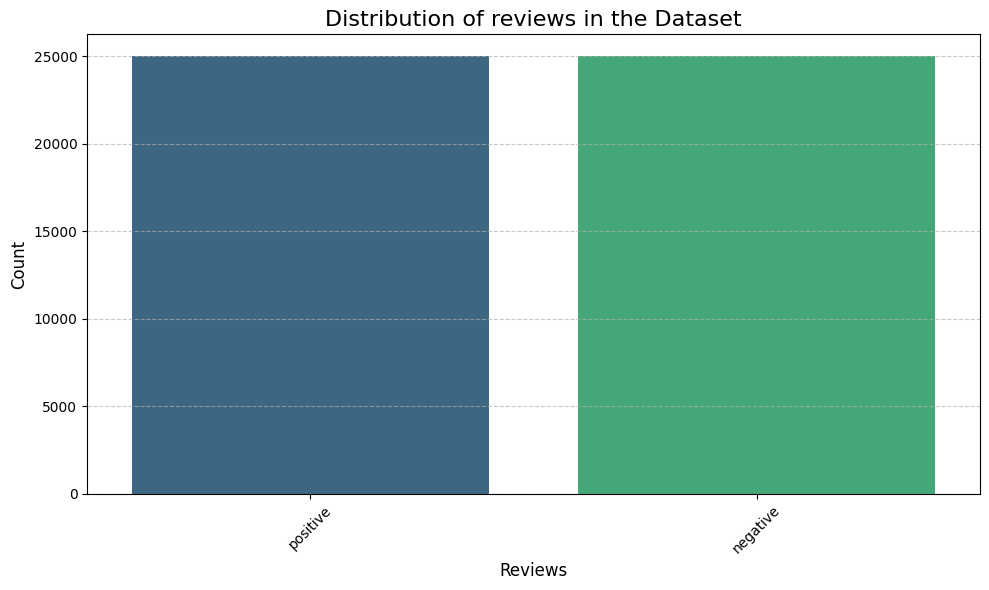

In [12]:
# Visualizing Distribution of Reviews

label_counts = df['Label'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of reviews in the Dataset', fontsize=16)
plt.xlabel('Reviews', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

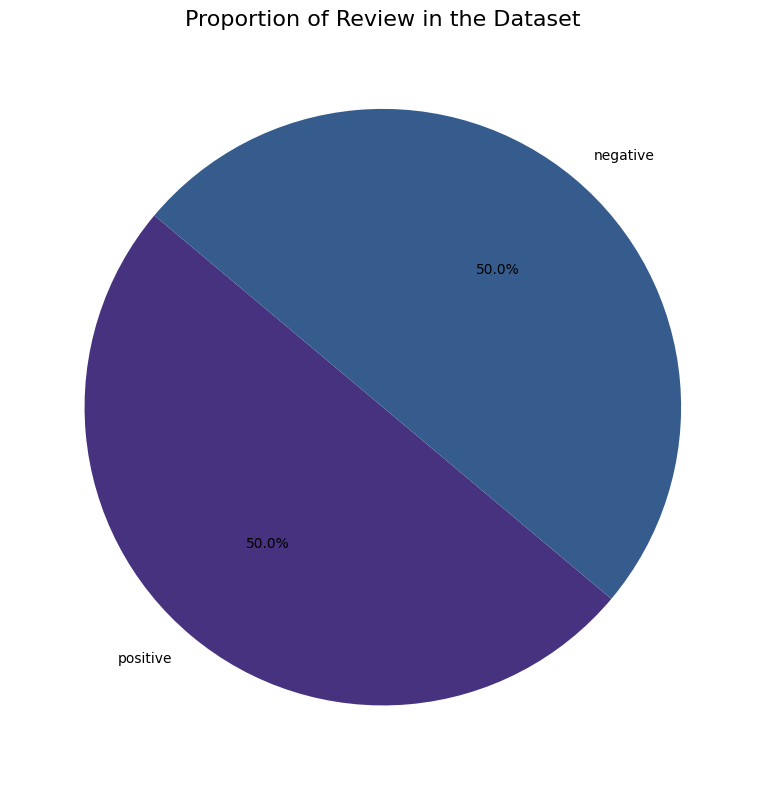

In [13]:
# Visualizing Reviews Distribution

plt.figure(figsize=(8, 8))

df['Label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Proportion of Review in the Dataset', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

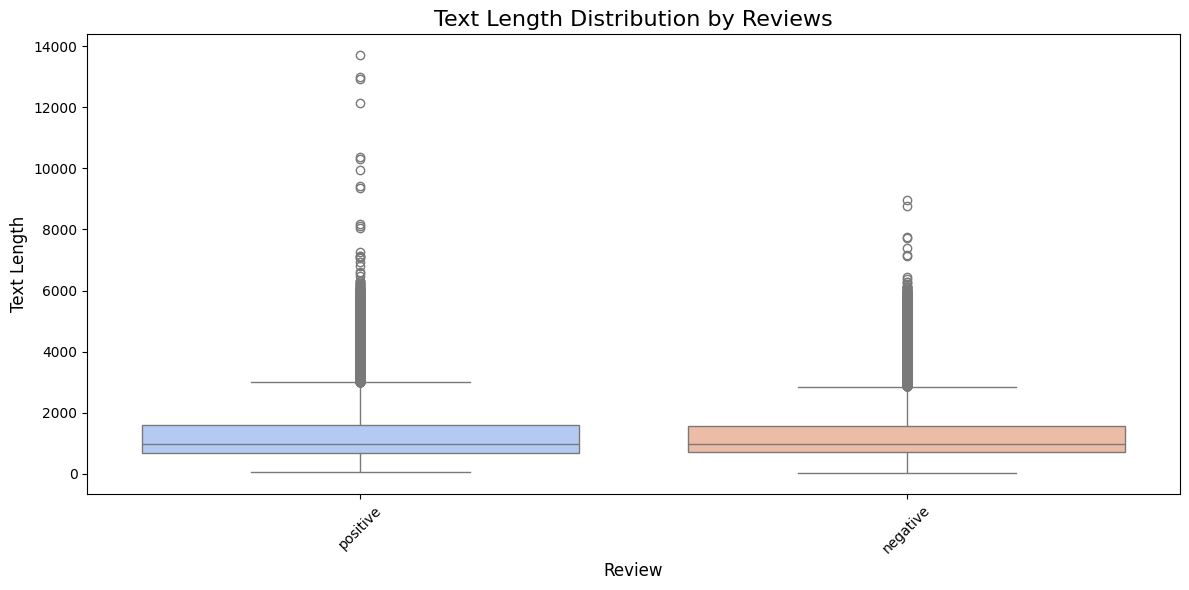

In [14]:
# Representing Text Length Distribution by Reviews

df['Text_Length'] = df['Text'].apply(len)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Label', y='Text_Length', data=df, palette='coolwarm')
plt.title('Text Length Distribution by Reviews', fontsize=16)
plt.xlabel('Review', fontsize=12)
plt.ylabel('Text Length', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

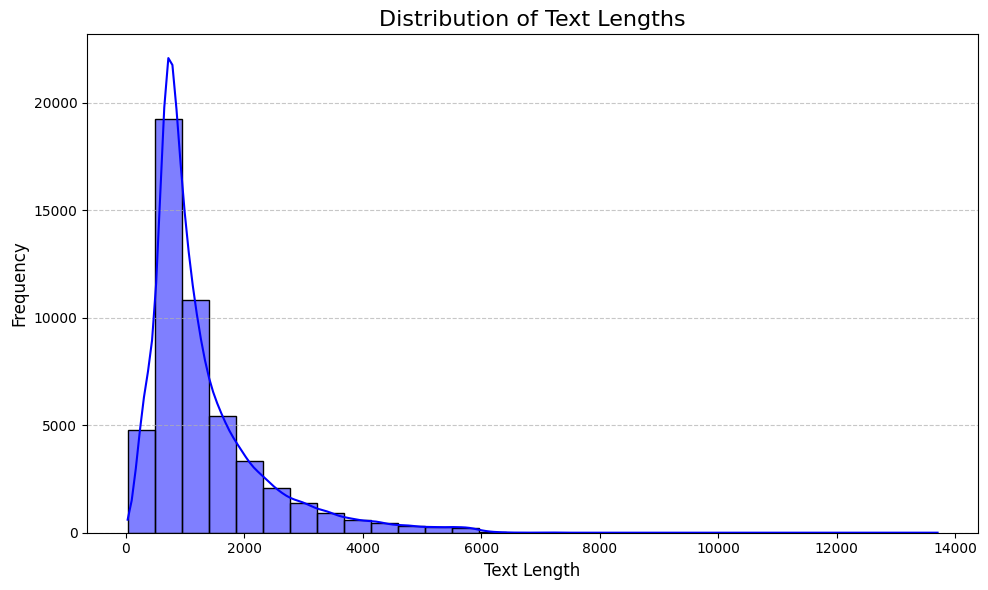

In [15]:
# Plotting Histogram for Distributon of Text Lengths

plt.figure(figsize=(10, 6))
df['Text_Length'] = df['Text'].apply(len)
sns.histplot(df['Text_Length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Text Lengths', fontsize=16)
plt.xlabel('Text Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

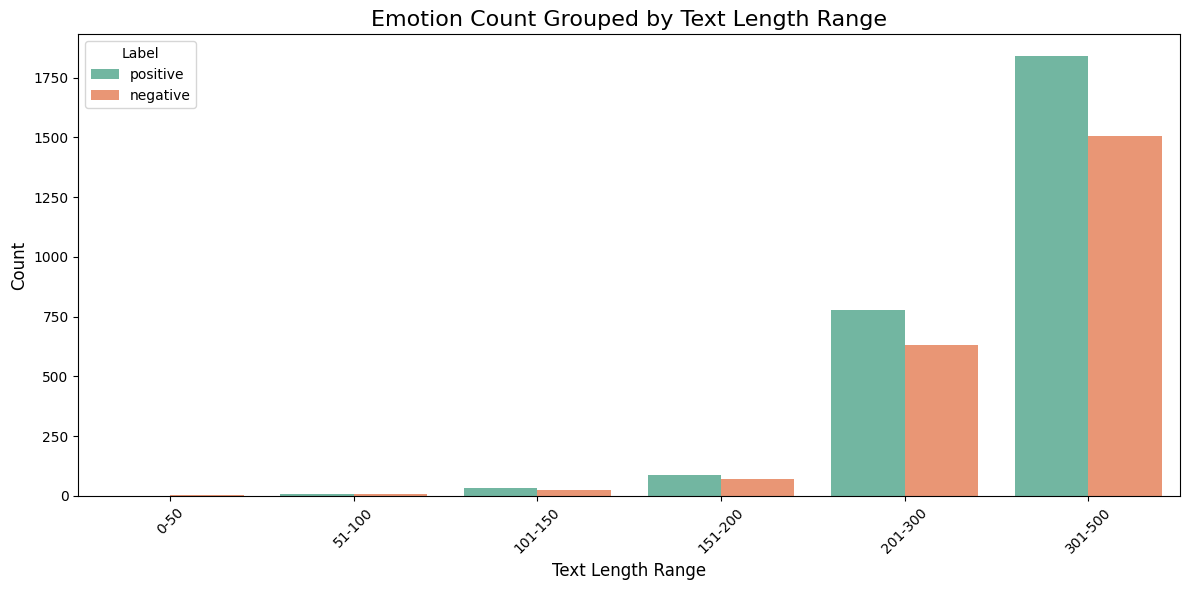

In [16]:
# Visualizing Review Count Grouped by Text Length Range

df['Length_Bin'] = pd.cut(df['Text_Length'], bins=[0, 50, 100, 150, 200, 300, 500],
                          labels=['0-50', '51-100', '101-150', '151-200', '201-300', '301-500'])

plt.figure(figsize=(12, 6))
sns.countplot(x='Length_Bin', hue='Label', data=df, palette='Set2')
plt.title('Emotion Count Grouped by Text Length Range', fontsize=16)
plt.xlabel('Text Length Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

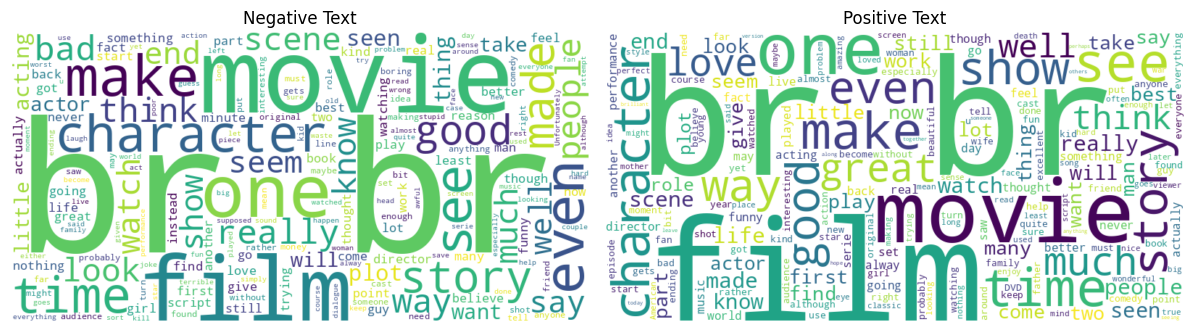

In [17]:
# Creating WordCloud for Both the Labels

from wordcloud import WordCloud

Review_dfs = {
    'Negative': df[df['Label'] == 'negative'],
    'Positive': df[df['Label'] == 'positive'],
}

plt.figure(figsize=(18, 9))
for i, (review, subset) in enumerate(Review_dfs.items(), 1):
    combined_text = ' '.join(subset['Text'])
    if combined_text.strip():  # Check if combined_text is not empty
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

        plt.subplot(2, 3, i)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'{review} Text')
        plt.axis('off')

plt.tight_layout()
plt.show()

## Data Cleaning & Preprocessing

In [18]:
# Removing Html Tags and Url Using Regex

import re

def remove_html(Text):
  clean_text = re.sub(r'<.*?>', '', Text)
  return clean_text

def remove_url(Text):
  clean_text = re.sub(r'http\S+', '', Text)
  return clean_text

In [19]:
# Converting Text to Lowercase

def convert_to_lowercase(Text):
    return Text.lower()

In [20]:
# Replacing Chat Words

def replace_chat_words(Text):
    chat_words = {
        "BRB": "Be right back",
        "BTW": "By the way",
        "OMG": "Oh my God/goodness",
        "TTYL": "Talk to you later",
        "OMW": "On my way",
        "SMH/SMDH": "Shaking my head/shaking my darn head",
        "LOL": "Laugh out loud",
        "TBD": "To be determined",
        "IMHO/IMO": "In my humble opinion",
        "HMU": "Hit me up",
        "IIRC": "If I remember correctly",
        "LMK": "Let me know",
        "OG": "Original gangsters (used for old friends)",
        "FTW": "For the win",
        "NVM": "Nevermind",
        "OOTD": "Outfit of the day",
        "Ngl": "Not gonna lie",
        "Rq": "real quick",
        "Iykyk": "If you know, you know",
        "Ong": "On god (I swear)",
        "YAAAS": "Yes!",
        "Brt": "Be right there",
        "Sm": "So much",
        "Ig": "I guess",
        "Wya": "Where you at",
        "Istg": "I swear to god",
        "Hbu": "How about you",
        "Atm": "At the moment",
        "Asap": "As soon as possible",
        "Fyi": "For your information"
    }
    for word, expanded_form in chat_words.items():
        Text = Text.replace(word, expanded_form)
    return Text
     


In [23]:
# Removing Witespace and Special Chararcters

def remove_whitespace(text):
    return text.strip()

def remove_special_characters(text):
    clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return clean_text

In [21]:
# Removing Punctuation and Stop Words

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string,time
string.punctuation

def remove_punctuation(Text):
    clean_text = ''.join(ch for ch in Text if ch not in string.punctuation)
    return clean_text

def remove_stopwords(Text):
    stop_words = set(stopwords.words('english'))
    words = Text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/bhxveshhh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# Combing all cleaned function to one dataframe

def preprocess_text(Text):
    text = remove_html(Text)
    text = remove_url(Text)
    text = convert_to_lowercase(Text)
    text = replace_chat_words(Text)
    text = remove_punctuation(Text)
    text = remove_stopwords(Text)
    text = remove_whitespace(Text)
    text = remove_special_characters(Text)
    return text

df['Text'] = df['Text'].apply(preprocess_text)

In [25]:
df.head()

,Text,Label,Text_Length,Length_Bin
0,One of the other reviewers has mentioned that ...,positive,1761,NaN
1,A wonderful little production br br The filmin...,positive,998,NaN
2,I thought this was a wonderful way to spend ti...,positive,926,NaN
3,Basically theres a family where a little boy J...,negative,748,NaN
4,Petter Matteis Love in the Time of Money is a ...,positive,1317,NaN


In [26]:
# Dropping unwanted column 

df.drop(['Text_Length', 'Length_Bin'], axis=1, inplace=True)

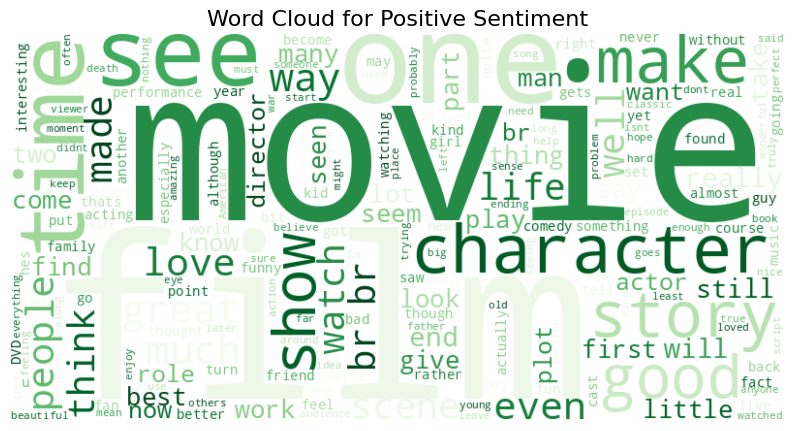

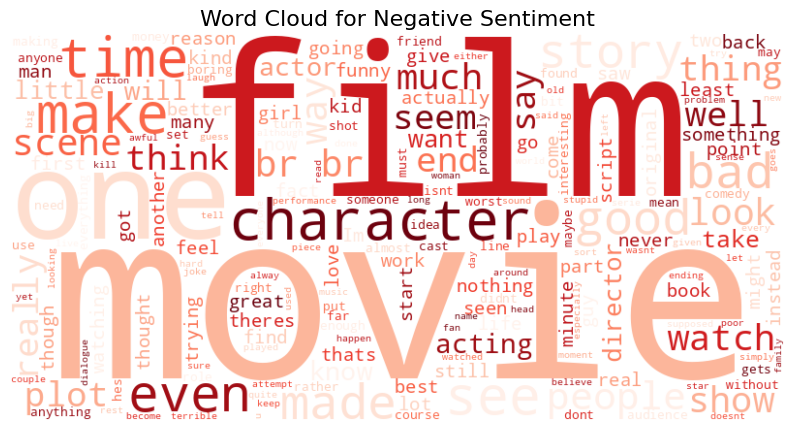

In [27]:
# Plotting top 10 words used in positive & Negative sentiment after data cleaning

from wordcloud import WordCloud

# Positive Sentiment
positive_text = " ".join(df[df['Label'] == 'positive']['Text'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Sentiment", fontsize=16)
plt.show()

# Negative Sentiment
negative_text = " ".join(df[df['Label'] == 'negative']['Text'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Sentiment", fontsize=16)
plt.show()

## Data Preprocessing

In [28]:
# Handling Contractions

import contractions
df['Text'] = df['Text'].apply(lambda x: contractions.fix(x))

In [29]:
# Tokenization

import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
df['tokens'] = df['Text'].apply(word_tokenize)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/bhxveshhh/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [30]:
# Lemmatization

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/bhxveshhh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
# Handling Emoji's

import emoji
df['Text'] = df['Text'].apply(lambda x: emoji.demojize(x))
     

# Handling Hashtags

df['hashtags'] = df['Text'].apply(lambda x: re.findall(r'#\w+', x))
df['Text'] = df['Text'].apply(lambda x: re.sub(r'#\w+', '', x))
     

# Handling Mentions and Username

df['Text'] = df['Text'].apply(lambda x: re.sub(r'@\w+', '', x))

In [32]:
df.head()

,Text,Label,tokens,hashtags
0,One of the other reviewers has mentioned that ...,positive,"[One, of, the, other, reviewer, ha, mentioned,...",[]
1,A wonderful little production br br The filmin...,positive,"[A, wonderful, little, production, br, br, The...",[]
2,I thought this was a wonderful way to spend ti...,positive,"[I, thought, this, wa, a, wonderful, way, to, ...",[]
3,Basically there is a family where a little boy...,negative,"[Basically, there, is, a, family, where, a, li...",[]
4,Petter Matteis Love in the Time of Money is a ...,positive,"[Petter, Matteis, Love, in, the, Time, of, Mon...",[]


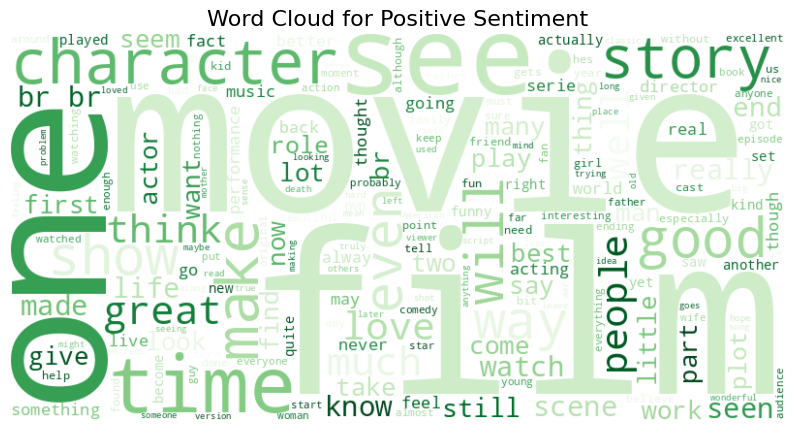

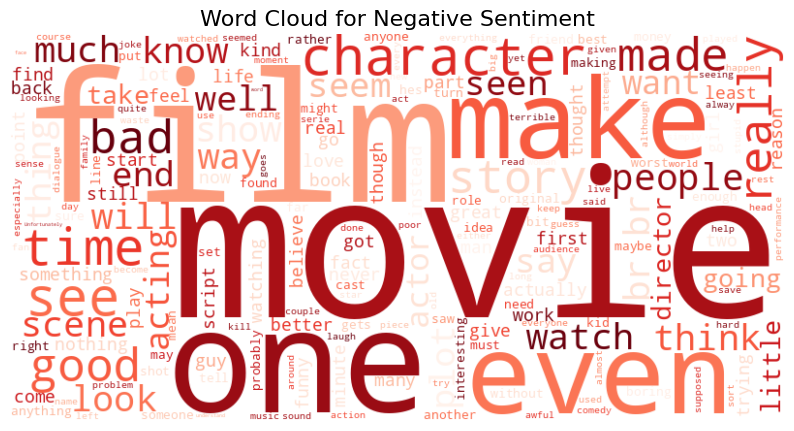

In [33]:
# Plotting top 10 words used in positive & Negative sentiment after data preprocessing

from wordcloud import WordCloud

# Positive Sentiment
positive_text = " ".join(df[df['Label'] == 'positive']['Text'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Sentiment", fontsize=16)
plt.show()

# Negative Sentiment
negative_text = " ".join(df[df['Label'] == 'negative']['Text'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Sentiment", fontsize=16)
plt.show()

In [34]:
df['Label'] = df['Label'].replace({'positive': 1, 'negative': 0})

## Model building & Evaluation

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Bidirectional, GRU, BatchNormalization, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
# Tokenization and Padding

max_words = 10000  
max_len = 100  
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

In [37]:
# Train Test Split

y = np.array(df['Label'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

In [79]:
vocab_size = len(tokenizer.word_index) + 1  
embedding_dim = 128
max_length = max_len  

In [80]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(Dropout(0.3)) 
model.add(Bidirectional(GRU(120, return_sequences=True, recurrent_activation='sigmoid', reset_after=True)))
model.add(Dropout(0.3))  
model.add(Bidirectional(GRU(64, return_sequences=False, recurrent_activation='sigmoid', reset_after=True)))
model.add(Dropout(0.3))  
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))  

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(
    X_train,
    y_train, epochs=5,
    batch_size=1000,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)


Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.5614 - loss: 0.7105 - val_accuracy: 0.7301 - val_loss: 0.6367
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.7838 - loss: 0.4730 - val_accuracy: 0.8058 - val_loss: 0.5223
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.8711 - loss: 0.3185 - val_accuracy: 0.8229 - val_loss: 0.5170
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.8936 - loss: 0.2666 - val_accuracy: 0.8079 - val_loss: 0.4925
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.9145 - loss: 0.2265 - val_accuracy: 0.8039 - val_loss: 0.4626


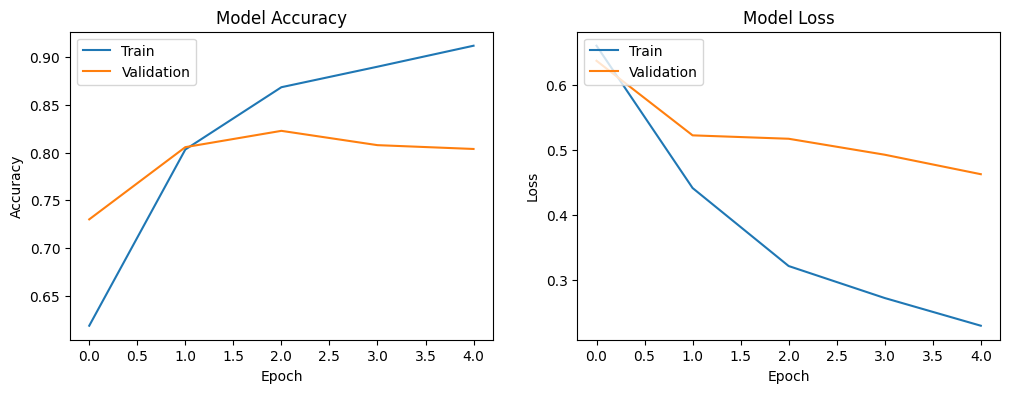

In [ ]:
#Plot training & validation accuracy values

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()